# Fumiaki

Here are some map ideas for your project. Let's discuss about them in the class.

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib as mpl
# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

NY Crime Dataは[ここ](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/explore/query/SELECT%0A%20%20%60arrest_key%60%2C%0A%20%20%60arrest_date%60%2C%0A%20%20%60pd_cd%60%2C%0A%20%20%60pd_desc%60%2C%0A%20%20%60ky_cd%60%2C%0A%20%20%60ofns_desc%60%2C%0A%20%20%60law_code%60%2C%0A%20%20%60law_cat_cd%60%2C%0A%20%20%60arrest_boro%60%2C%0A%20%20%60arrest_precinct%60%2C%0A%20%20%60jurisdiction_code%60%2C%0A%20%20%60age_group%60%2C%0A%20%20%60perp_sex%60%2C%0A%20%20%60perp_race%60%2C%0A%20%20%60x_coord_cd%60%2C%0A%20%20%60y_coord_cd%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60geocoded_column%60%2C%0A%20%20%60%3A%40computed_region_f5dn_yrer%60%2C%0A%20%20%60%3A%40computed_region_yeji_bk3q%60%2C%0A%20%20%60%3A%40computed_region_92fq_4b7q%60%2C%0A%20%20%60%3A%40computed_region_sbqj_enih%60%2C%0A%20%20%60%3A%40computed_region_efsh_h5xi%60%0AWHERE%0A%20%20%60arrest_date%60%0A%20%20%20%20BETWEEN%20%222023-02-01T10%3A28%3A17%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222023-03-01T10%3A28%3A17%22%20%3A%3A%20floating_timestamp/page/filter)からダウンロード

In [2]:
# dataを読み込む
ny = gpd.read_file('NYPD 2023-03.geojson')

In [3]:
# dataの情報を表示
ny.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16678 entries, 0 to 16677
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   perp_sex                    16678 non-null  object        
 1   latitude                    16678 non-null  object        
 2   arrest_precinct             16678 non-null  object        
 3   y_coord_cd                  16678 non-null  object        
 4   jurisdiction_code           16678 non-null  object        
 5   x_coord_cd                  16678 non-null  object        
 6   @computed_region_sbqj_enih  16678 non-null  object        
 7   age_group                   16678 non-null  object        
 8   @computed_region_efsh_h5xi  16642 non-null  object        
 9   ky_cd                       16678 non-null  object        
 10  law_code                    16678 non-null  object        
 11  arrest_boro                 16678 non-null  ob

In [4]:
pd_desc_counts = ny['age_group'].value_counts()
top_10_pd_desc = pd_desc_counts.head(10)
print(top_10_pd_desc)


25-44    9685
45-64    3251
18-24    2869
<18       621
65+       252
Name: age_group, dtype: int64


In [5]:
# 人種別の犯罪件数を表示
perp_race_counts = ny['perp_race'].value_counts()
print(perp_race_counts)


BLACK                             8159
WHITE HISPANIC                    4225
WHITE                             1659
BLACK HISPANIC                    1645
ASIAN / PACIFIC ISLANDER           873
UNKNOWN                             67
AMERICAN INDIAN/ALASKAN NATIVE      50
Name: perp_race, dtype: int64


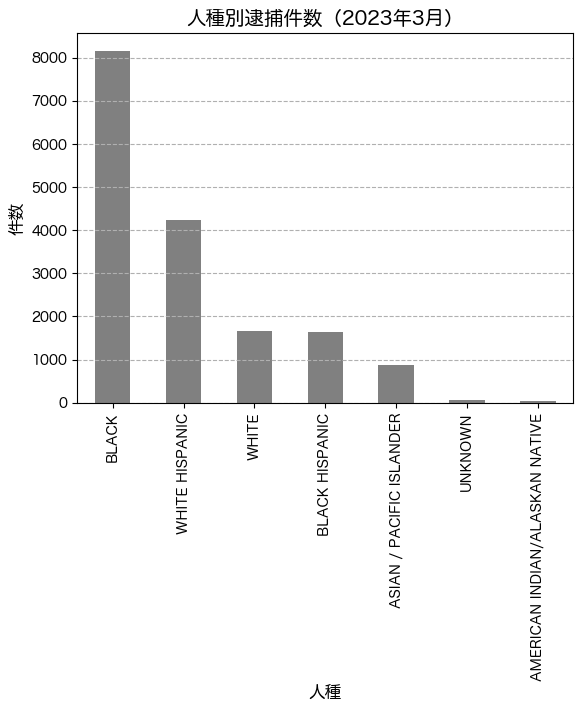

In [6]:
# Plot the bar chart with a single color
ax = ny['perp_race'].value_counts().plot(kind='bar', color='gray')

# Set labels and title
plt.xlabel('人種', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.title('人種別逮捕件数（2023年3月）', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Adjust font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


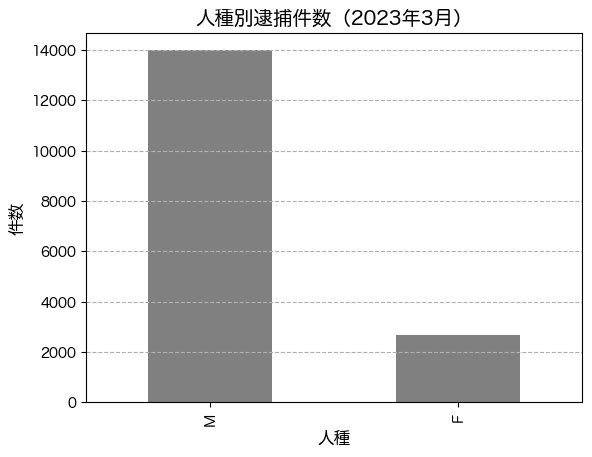

In [7]:
# Plot the bar chart with a single color
ax = ny['perp_sex'].value_counts().plot(kind='bar', color='gray')

# Set labels and title
plt.xlabel('人種', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.title('人種別逮捕件数（2023年3月）', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Adjust font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


In [ ]:
pd_desc_counts = ny['pd_desc'].value_counts()
print(pd_desc_counts)


In [ ]:
filtered_ny = ny[ny['perp_race'] == 'BLACK']


In [11]:
nyb

,perp_sex,latitude,arrest_precinct,y_coord_cd,jurisdiction_code,x_coord_cd,@computed_region_sbqj_enih,age_group,@computed_region_efsh_h5xi,ky_cd,...,ofns_desc,pd_desc,perp_race,law_cat_cd,arrest_key,pd_cd,arrest_date,@computed_region_yeji_bk3q,@computed_region_f5dn_yrer,geometry
0,M,40.742954,108,209958,0,996643,66,<18,16858,344,...,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BLACK,M,262906326,101,2023-02-02,3,53,POINT (-73.95527 40.74295)
1,M,40.7226409964758,112,202586,0,1025401,70,25-44,14786,104,...,RAPE,RAPE 3,WHITE,F,262898615,153,2023-02-02,3,40,POINT (-73.85154 40.72264)
2,F,40.648149,67,175419,0,999662,40,25-44,16866,351,...,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",BLACK,M,262909194,259,2023-02-02,2,61,POINT (-73.94446 40.64815)
3,M,40.69557,113,192776,0,1048530,71,25-44,24669,359,...,OFFENSES AGAINST PUBLIC ADMINI,RESISTING ARREST,BLACK,M,262939177,750,2023-02-02,3,41,POINT (-73.76819 40.69557)
4,M,40.852834,48,250009,0,1016293,31,18-24,10936,106,...,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",BLACK HISPANIC,F,262883725,109,2023-02-02,5,35,POINT (-73.88417 40.85283)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16673,M,40.684454,78,188642,0,990420,50,25-44,17619,107,...,BURGLARY,"BURGLARY,UNCLASSIFIED,UNKNOWN",BLACK,F,264389834,244,2023-03-01,2,68,POINT (-73.97775 40.68445)
16674,M,40.57812327,60,149905,0,995635,35,25-44,13826,106,...,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",WHITE,F,264397787,109,2023-03-01,2,21,POINT (-73.95902 40.57812)
16675,M,40.810391,40,234533,0,1005040,23,18-24,10932,359,...,OFFENSES AGAINST PUBLIC ADMINI,"CONTEMPT,CRIMINAL",WHITE HISPANIC,M,264391307,748,2023-03-01,5,49,POINT (-73.92490 40.81039)
16676,M,40.840775,33,245600,0,1001888,21,45-64,13090,341,...,PETIT LARCENY,"LARCENY,PETIT FROM OPEN AREAS,",WHITE HISPANIC,M,264376700,339,2023-03-01,4,47,POINT (-73.93625 40.84078)


<AxesSubplot: >

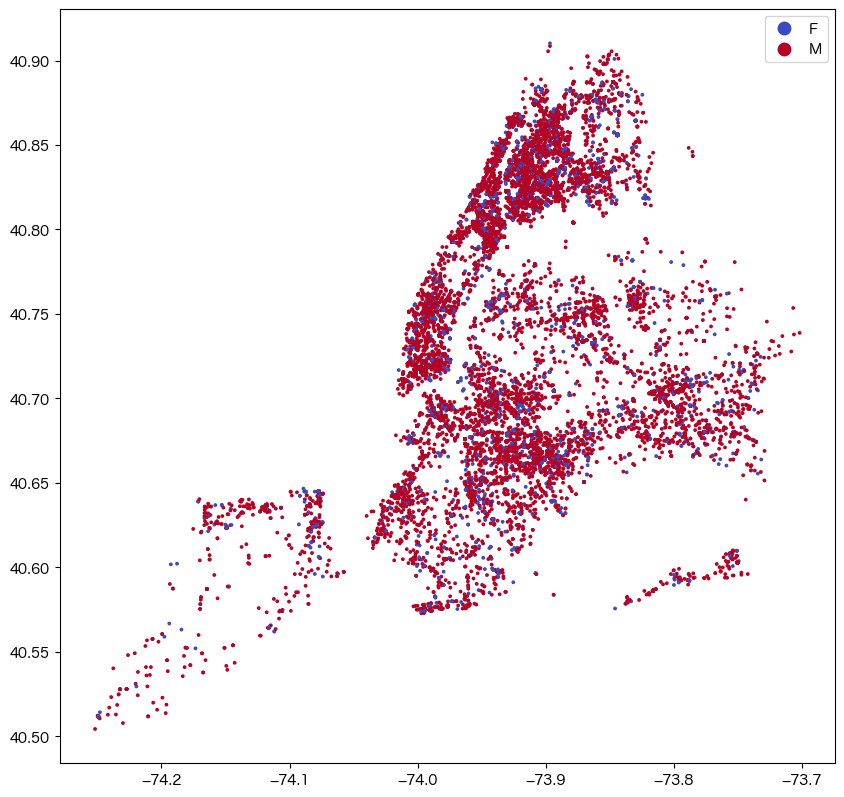

In [8]:
ny.plot(column='perp_sex', legend=True, figsize=(10, 10), cmap='coolwarm', markersize=3)


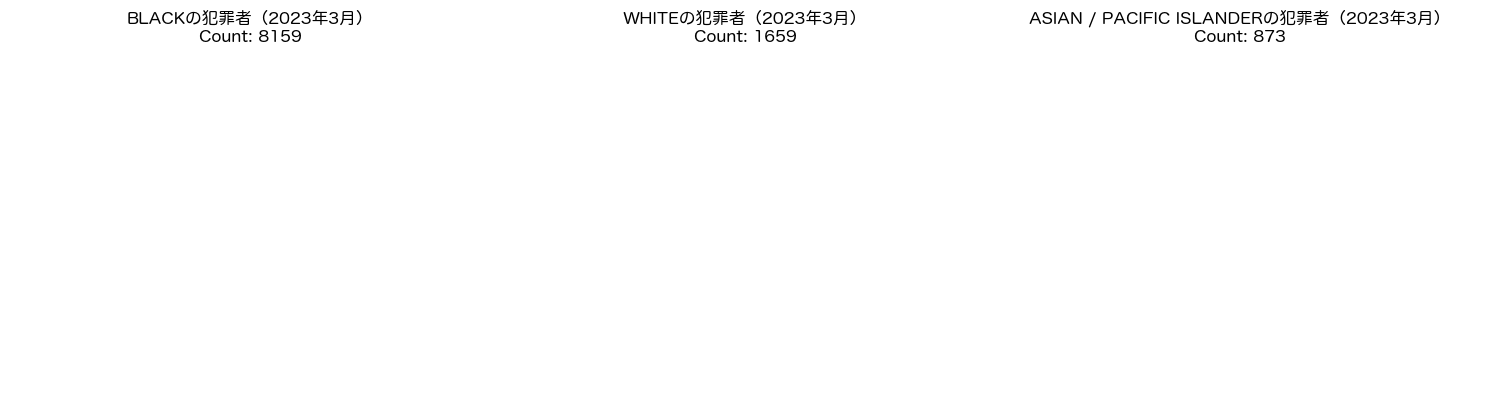

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Get the minimum and maximum values of x and y coordinates
# x座標とy座標の最小値と最大値を取得する
min_x = ny['geometry'].bounds['minx'].min()
max_x = ny['geometry'].bounds['maxx'].max()
min_y = ny['geometry'].bounds['miny'].min()
max_y = ny['geometry'].bounds['maxy'].max()


# Define the races to plot
# プロットする人種を定義する
races = ['BLACK', 'WHITE', 'ASIAN / PACIFIC ISLANDER']
color_map = {'BLACK': 'blue', 'WHITE': 'red','ASIAN / PACIFIC ISLANDER':'green'}

# Iterate over the races and create a subplot for each race
# 人種を反復処理し、各人種のサブプロットを作成する
for i, race in enumerate(races):
    # Filter the dataframe for the current race
    # 現在の人種のデータフレームをフィルタリングする
    filtered_df = ny[ny['perp_race'] == race].copy()
    filtered_df.to_crs(epsg=3857, inplace=True)
    
    # Create a subplot for the current race
    # 現在の人種のサブプロットを作成する
    ax = axes[i]
    
    # Plot the current race on the subplot
    # 現在の人種をサブプロットにプロットする
    filtered_df.plot(ax=ax, legend=True, color=color_map[race], markersize=3, alpha=0.8)
    
    # Set axis off for the subplot
    # サブプロットの軸をオフにする
    ax.set_axis_off()
    
    # Set the same xlim and ylim for each subplot
    # 各サブプロットに同じxlimとylimを設定する
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    
    # Add basemap to the subplot
    # サブプロットにベースマップを追加する
    # ctx.add_basemap(ax, source='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}', alpha=0.5)
    
    # Set title for the subplot with count
    # サブプロットのタイトルとカウントを設定する
    count = len(filtered_df)
    ax.set_title(f'{race}の犯罪者（2023年3月）\nCount: {count}', fontsize=12)

# Adjust the layout of subplots
# サブプロットのレイアウトを調整する
plt.tight_layout()

# Show the plot
# プロットを表示する
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles for each layer
suigai1 = gpd.read_file('suigai1.shp')
suigai2 = gpd.read_file('suigai2.shp')
suigai3 = gpd.read_file('suigai3.shp')

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each layer on the axis
suigai1.plot(ax=ax, color='red', label='suigai1')
suigai2.plot(ax=ax, color='blue', label='suigai2')
suigai3.plot(ax=ax, color='green', label='suigai3')

# Set the title and legend
ax.set_title('Geopandas Map Plot with Three Layers')
ax.legend()

# Show the plot
plt.show()
